In [1]:
from dl import authClient as ac, queryClient as qc, storeClient as sc, helpers
import pylab as plt
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import math

In [2]:
token=ac.login('mgkadrmas')

In [47]:
def LMCParallax (ra,dec,radius):
    #take query
    res=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ra)+','+str(dec)+','+str(radius)+')')
    df=helpers.utils.convert(res,'table')
    good1 = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<20.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2)
    medpmra=np.median(df['pmra'][good1])
    medpmdec=np.median(df['pmdec'][good1])
    pndist=np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)
    good2 = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<19.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2) &(pndist<=2.0)
    medplx=np.median(df['parallax'][good2])+0.030112982075019102 #right offset for correct distance 
    ngood=np.sum(good2)
    SE= (1/ngood)*math.sqrt(sum((medplx-(df['parallax'][good2]))**2))
    print(ra, dec, radius, ngood, medplx, SE)
    return (ngood, medplx, SE)


In [68]:
#expanded with a larger range: dec -80 to -55 #ra 55 to 110 

radius=0.5
dtype = np.dtype([('ra',float),('dec',float),('radius',float),('ngood',int),('parallax',float),('SE',float)])
cat = np.zeros([56,26],dtype=dtype)
for i in range (56):
    ra=i+55
    for j in range (26):
        dec=j-80
        (ngood, medplx, SE) = LMCParallax(ra,dec,radius) 
        cat[i,j]['ra']=ra
        cat[i,j]['dec']=dec
        cat[i,j]['radius']=radius
        cat[i,j]['ngood']=ngood
        cat[i,j]['parallax']=medplx
        cat[i,j]['SE']=SE

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


55 -80 0.5 10 0.1699545740636661 0.03719634324255893
55 -79 0.5 12 0.07503797978338705 0.027144552863892363
55 -78 0.5 16 0.09129159934401465 0.027492706119029365
55 -77 0.5 38 0.0530114565855639 0.018769136562838705
55 -76 0.5 36 0.014821183864666403 0.01873477653532698
55 -75 0.5 57 0.0322307972658893 0.012906951753161576
55 -74 0.5 41 -0.008651442664165097 0.012710747152984585
55 -73 0.5 37 0.0303686575584895 0.016385449713336858
55 -72 0.5 30 0.005486460309222303 0.017307498497114146
55 -71 0.5 29 0.0579663656786905 0.01687034604542865
55 -70 0.5 24 0.032047007339733105 0.02015960185740818
55 -69 0.5 6 -0.045613691830134195 0.04610899131557389
55 -68 0.5 6 0.08175719482012521 0.04213160172596931
55 -67 0.5 8 0.08158129566255995 0.03499554977658212
55 -66 0.5 4 0.1445735242584626 0.04455379136045742
55 -65 0.5 3 0.07943272909784581 0.05651343972277355
55 -64 0.5 4 0.0651650643735673 0.036205541881188984
55 -63 0.5 1 0.0491406231645699 0.030112982075019102
55 -62 0.5 5 0.151897593172

/data0/sw/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2917: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/data0/sw/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


55 -56 0.5 0 nan nan
55 -55 0.5 5 0.12804935011164162 0.06592158882796828
56 -80 0.5 9 0.2018586117920671 0.042277256674678854
56 -79 0.5 8 0.033496902899066504 0.03631544342523047
56 -78 0.5 23 0.0685546586805252 0.024403851696794147
56 -77 0.5 62 0.036328777132063755 0.012555837303025204
56 -76 0.5 65 0.049532995600605007 0.01274421375991146
56 -75 0.5 70 0.004574516784305354 0.012554470656788427
56 -74 0.5 49 0.022915321023139902 0.013888491473839103
56 -73 0.5 49 0.014640710023350302 0.013080101527796657
56 -72 0.5 41 0.0436374400580163 0.012751814946219202
56 -71 0.5 38 0.049195103212056196 0.015172218684192527
56 -70 0.5 36 0.017481218130520903 0.018526423198506455
56 -69 0.5 19 0.0551719342637393 0.03044904959676189
56 -68 0.5 4 0.0607844910704048 0.053743175758200826
56 -67 0.5 8 0.08158129566255995 0.025422851974562916
56 -66 0.5 7 0.0867416438861653 0.04321218209847774
56 -65 0.5 2 0.01660967558115095 0.03402135716568743
56 -64 0.5 3 0.10608626365065339 0.05712389215754203
56

61 -59 0.5 0 nan nan
61 -58 0.5 2 0.09671538787704935 0.07155812730381124
61 -57 0.5 3 0.030125922229171 0.022478170310757682
61 -56 0.5 1 0.1867377515305581 0.030112982075019112
61 -55 0.5 0 nan nan
62 -80 0.5 10 0.12706724359038427 0.0323110782330252
62 -79 0.5 13 0.1338143690635471 0.024693998114637922
62 -78 0.5 43 0.023401012150392704 0.01594042190738312
62 -77 0.5 125 0.013047026082832203 0.00900683363989923
62 -76 0.5 165 0.0193082945581712 0.007619587095459016
62 -75 0.5 192 0.03464002045288675 0.00808196345799821
62 -74 0.5 234 0.006625960343876653 0.0062297451069423335
62 -73 0.5 284 0.02888536320646465 0.005991578256190277
62 -72 0.5 281 0.012507419868113202 0.005671023568184034
62 -71 0.5 288 0.031034940135281602 0.006108242802734165
62 -70 0.5 273 0.014088368853750803 0.005891448204292336
62 -69 0.5 250 0.024889864665728352 0.006581841307522472
62 -68 0.5 192 -0.0014707642620571983 0.007140940714043657
62 -67 0.5 156 0.0167843569592485 0.007776180346941941
62 -66 0.5 94 0.

67 -64 0.5 206 0.009082809328087502 0.006547700689093762
67 -63 0.5 141 0.035135977205989405 0.008864914564943054
67 -62 0.5 72 0.030063462122509852 0.012494152109103408
67 -61 0.5 55 0.015023857678695202 0.014307602562892735
67 -60 0.5 32 0.006049515303034703 0.01603380453684808
67 -59 0.5 8 0.0488733467970051 0.027963335810161406
67 -58 0.5 3 0.0358034490223786 0.06751781840905353
67 -57 0.5 5 0.1131685055939119 0.031168446662985495
67 -56 0.5 2 0.15903090320968746 0.041379329650655786
67 -55 0.5 5 0.1043723022076472 0.05622435992741936
68 -80 0.5 15 0.122272876603879 0.02476590053968092
68 -79 0.5 14 0.1365590746158633 0.028964475764425013
68 -78 0.5 117 0.027151254008136203 0.00954541528195584
68 -77 0.5 219 0.013231285863903403 0.006525337799873403
68 -76 0.5 345 0.020462416815461203 0.005192013856363025
68 -75 0.5 1035 0.0188669264347818 0.003075151093232681
68 -74 0.5 1801 0.015167081469124702 0.0023847635152413277
68 -73 0.5 2586 0.014630378581483252 0.0019738213341231724
68 -7

73 -73 0.5 8510 0.025022911922335654 0.0011123066918864613
73 -72 0.5 9568 0.0179640406365624 0.0010296961156114563
73 -71 0.5 10358 0.011640947192645603 0.0009740705878548106
73 -70 0.5 13977 0.0172309881853894 0.0008496912391129752
73 -69 0.5 14684 0.018549676994370653 0.000832378927799973
73 -68 0.5 14087 0.017002495851681402 0.0008539337167345666
73 -67 0.5 8742 0.0154633566174662 0.0010961858006435915
73 -66 0.5 5967 0.013088171437447203 0.0013267033202895063
73 -65 0.5 3560 0.0144608160845026 0.0017245404422472689
73 -64 0.5 1967 0.018402790207847804 0.0023926162842019074
73 -63 0.5 752 0.03189590461949025 0.0038786477667916335
73 -62 0.5 274 0.02940879478036595 0.005879223819195371
73 -61 0.5 166 0.03684250466968715 0.008557229182043248
73 -60 0.5 68 0.011133285227995952 0.013062591023796297
73 -59 0.5 39 0.033393473082051706 0.016779570472777484
73 -58 0.5 14 0.0862384969557931 0.03292844074427626
73 -57 0.5 5 0.034693254738448503 0.05178854560297927
73 -56 0.5 2 0.107956762386

78 -59 0.5 74 0.0567900856893169 0.010671588526981402
78 -58 0.5 33 0.1183399706778768 0.023555644345140195
78 -57 0.5 15 0.0665506120764239 0.02519959081425466
78 -56 0.5 12 0.085720915475098 0.026118069516602206
78 -55 0.5 5 0.2046492632249321 0.03945584458893134
79 -80 0.5 25 0.0580849772657313 0.016623303934030983
79 -79 0.5 18 0.12910196401238566 0.02241109269968722
79 -78 0.5 179 0.0479017198965262 0.007643956045366121
79 -77 0.5 442 0.01915470281305065 0.004686271906532895
79 -76 0.5 2393 0.020000000000000004 0.002114100835410609
79 -75 0.5 5883 0.0198590239109758 0.0013233130927905016
79 -74 0.5 6241 0.021736366520485904 0.0012617461564966412
79 -73 0.5 10007 0.0188413519082923 0.0009995120099940103
79 -72 0.5 16555 0.0143565880592782 0.0007892087453247096
79 -71 0.5 23498 0.01633469141110895 0.0006604353714673256
79 -70 0.5 31552 0.016833623371524952 0.0005635498225628069
79 -69 0.5 26008 0.011244428198947602 0.0006084103413996232
79 -68 0.5 20211 0.0086527961576668 0.00071440

84 -70 0.5 26584 0.02119718387978195 0.0006051656828442394
84 -69 0.5 16370 0.0226736448747984 0.0007740388210389869
84 -68 0.5 14786 0.02514705631474435 0.0008389794694180979
84 -67 0.5 11154 0.023547950896146853 0.0009708524336817462
84 -66 0.5 9676 0.022758052653414303 0.0010452830064684236
84 -65 0.5 8759 0.0268011508954431 0.0011095531872844307
84 -64 0.5 6061 0.0237258032476165 0.001317833541598067
84 -63 0.5 4854 0.027993006285574704 0.0014743284391068472
84 -62 0.5 2443 0.032528923676027305 0.002087062337545502
84 -61 0.5 539 0.0304086164812121 0.004386634015071531
84 -60 0.5 197 0.010623254047107601 0.006884114510843045
84 -59 0.5 95 0.016287587784467303 0.010023985609388615
84 -58 0.5 62 0.04608218403303051 0.013969988733214714
84 -57 0.5 7 0.1064694048759041 0.05587658732697853
84 -56 0.5 8 0.13374404121967262 0.026913363796713077
84 -55 0.5 11 0.0575459204116431 0.030835039597096953
85 -80 0.5 17 0.09360565126902169 0.027881899566318553
85 -79 0.5 23 0.07909671189445171 0.0

89 -55 0.5 5 0.19252073703988112 0.03825596619980435
90 -80 0.5 24 0.10971890085598986 0.019711990519024655
90 -79 0.5 18 0.113330796494925 0.020463421985581154
90 -78 0.5 45 0.042340824519096 0.01611927967216798
90 -77 0.5 312 0.03131995605738255 0.005662484643019967
90 -76 0.5 845 0.017074561681126203 0.0034778157287204702
90 -75 0.5 3315 0.0169259072574297 0.001775857378003095
90 -74 0.5 5412 0.024197502139223653 0.0013857617575936845
90 -73 0.5 6725 0.021813801258581303 0.0012469311644729222
90 -72 0.5 7814 0.020357972582737503 0.0011715751279353396
90 -71 0.5 9739 0.025985524313287902 0.0010386272498933513
90 -70 0.5 10041 0.0234936069049066 0.0010274200503787667
90 -69 0.5 9070 0.0307038339813953 0.0010922641915850615
90 -68 0.5 8490 0.0293543020135411 0.0011311225346931685
90 -67 0.5 8097 0.022704575280989802 0.0011541614063593144
90 -66 0.5 6644 0.027005610971314303 0.0012734798751562572
90 -65 0.5 5245 0.0264339820241333 0.0014036766065132693
90 -64 0.5 3863 0.0283376072679289

95 -65 0.5 2080 0.0321187261238456 0.0022868497836576666
95 -64 0.5 1272 0.03779931106518365 0.002902966870108609
95 -63 0.5 625 0.024092430809920802 0.004109210486007737
95 -62 0.5 230 0.0508461054621799 0.007502134676244837
95 -61 0.5 69 0.009572931731028102 0.011979715580706513
95 -60 0.5 19 0.08751961005192921 0.026682953126729952
95 -59 0.5 9 0.15023222908103911 0.028252179885902635
95 -58 0.5 19 0.1301606209874311 0.020076465321706777
95 -57 0.5 13 0.20503479267605812 0.03549354428267966
95 -56 0.5 17 0.0661842628568782 0.016006720099609063
95 -55 0.5 17 0.1415458830975471 0.028919519872935187
96 -80 0.5 46 0.12563192370376017 0.015901753565851322
96 -79 0.5 26 0.08816956309854256 0.022725705972398525
96 -78 0.5 28 0.10770199309724755 0.01953989358888754
96 -77 0.5 158 0.011479178424076503 0.008228534147143965
96 -76 0.5 333 0.0242926355289895 0.00555241792425486
96 -75 0.5 538 0.015497617212070103 0.004381694101436758
96 -74 0.5 1427 0.026159619227567103 0.002644282542530282
96 

101 -74 0.5 247 0.018497494328375504 0.006172742605349869
101 -73 0.5 321 0.013954105022839104 0.0054864758708763235
101 -72 0.5 553 0.027882134362447703 0.004333146515707202
101 -71 0.5 665 0.031260747217362 0.0040425919332301085
101 -70 0.5 830 0.021279567060571002 0.003535674877941295
101 -69 0.5 839 0.0295675710215243 0.003528445387592869
101 -68 0.5 736 0.027607296115094 0.0036833284856864204
101 -67 0.5 679 0.0326753951916346 0.003993083177124115
101 -66 0.5 506 0.028043604506570053 0.004657738478230767
101 -65 0.5 366 0.026142989325231552 0.005290123992926611
101 -64 0.5 173 0.04738576704860881 0.00883864348611603
101 -63 0.5 95 0.012405413762602902 0.010208707049047003
101 -62 0.5 27 0.122088337339425 0.018822863165328045
101 -61 0.5 22 0.1575366755653661 0.017860311145400466
101 -60 0.5 37 0.1121808158381083 0.020709674396912667
101 -59 0.5 22 0.16070857357716511 0.026933471557259333
101 -58 0.5 32 0.10689699373416935 0.02250735972164709
101 -57 0.5 27 0.12837813336135412 0.01

106 -57 0.5 37 0.1309464081757641 0.015634154870735887
106 -56 0.5 42 0.1254662092728139 0.015112360292912021
106 -55 0.5 60 0.1196933849217222 0.014314043471927445
107 -80 0.5 82 0.1362964807337636 0.012566236857427329
107 -79 0.5 79 0.0957320151441647 0.01361443643587428
107 -78 0.5 62 0.1300579544037626 0.013439274031196512
107 -77 0.5 54 0.08367469926565566 0.015544419304296045
107 -76 0.5 42 0.03717486469029655 0.015520764143280007
107 -75 0.5 31 0.054424631987582 0.018257380350750776
107 -74 0.5 54 0.0327209638451253 0.014559134178117248
107 -73 0.5 33 0.082238633784798 0.02010091968137682
107 -72 0.5 66 0.07773208918082215 0.014590740472034125
107 -71 0.5 51 0.0766420930667499 0.015575835516688601
107 -70 0.5 144 0.0524980336141594 0.009582178923015291
107 -69 0.5 66 0.031693699877960405 0.012840062286740303
107 -68 0.5 24 0.05142140397366395 0.02328526270729115
107 -67 0.5 28 0.08453841577668215 0.023912387932140698
107 -66 0.5 39 0.1083886117034608 0.016888783510584766
107 -65

In [69]:
from astropy.table import Table 
acat = Table(cat)

In [71]:
acat.write('LMCParallaxBig2.fits', format='fits')

In [73]:
acat=fits.getdata('LMCParallaxBig2.fits')

In [9]:
distmed=np.median(1/acat['parallax'])

/data0/sw/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [74]:
good3= acat['ngood']!=0

In [75]:
distmed=np.median(1/(acat['parallax'][good3]))
print (distmed)

####this value is not expected, much smaller then distmed for the smaller search. why? 

32.22174734802098


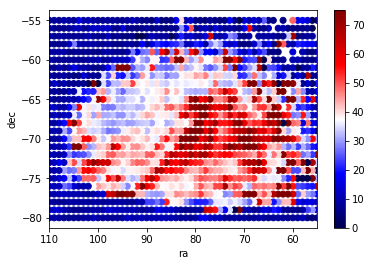

In [76]:
#Parallax expanded
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([110,55])
sc = ax.scatter(acat['ra'],acat['dec'],c=1/acat['parallax'], vmax=75, vmin=0, cmap=plt.cm.seismic)
fig.colorbar(sc)

In [56]:
racenter=81.9
deccenter= -69.866667
distcenter=50
inclin=27.81
pa=146.37

In [57]:
def dist2LMCtest(ra, dec, alph0, delt0, pa, io):
    ra1 = np.copy(ra)
    dec1 = np.copy(dec)
    ra1 = np.radians(ra1)
    dec1 = np.radians(dec1)
    alph0 = np.radians(alph0) #np.radians(82.25) #ra of LMC center
    delt0 = np.radians(delt0) #np.radians(-69.5) #dec of LMC center
    sd = np.sin(delt0)
    cd = np.cos(delt0)
    d0 = 49.9
    io = np.radians(io) #inclination #25.86
    pa = np.radians(pa+90) #np.radians(149.37+90)  #position angle of line-of-nodes
    cosr = cd*np.cos(dec1)*np.cos(ra1-alph0)+sd*np.sin(dec1)
    sinrcosph = -np.cos(dec1)*np.sin(ra1-alph0)
    sinrsinph = cd*np.sin(dec1)-sd*np.cos(dec1)*np.cos(ra1-alph0)
    dist = d0*np.cos(io)/(np.cos(io)*cosr-np.sin(io)*np.cos(pa)*sinrsinph+np.sin(io)*np.sin(pa)*sinrcosph)
    return dist

In [58]:
dtype = np.dtype([('ra',float),('dec',float),('dist',float)])
dcat = np.zeros([56,26], dtype=dtype)
for i in range (56):
    ra=i+55
    for j in range (26):
        dec=j-80
        (dist) = dist2LMCtest(ra,dec,racenter,deccenter,pa,inclin)
        dcat[i,j]['ra']=ra
        dcat[i,j]['dec']=dec
        dcat[i,j]['dist']=dist

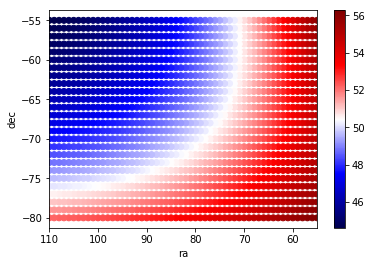

In [59]:
#Predicted 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([110,55])
sc = ax.scatter(dcat['ra'],dcat['dec'],c=dcat['dist'], cmap=plt.cm.seismic)
fig.colorbar(sc)

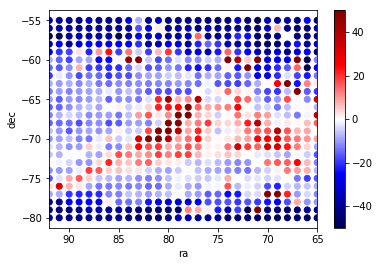

In [60]:
#Difference acat-dcat
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([92,65])
sc = ax.scatter(dcat['ra'], dcat['dec'], c=((1/acat['parallax'])-dcat['dist']), vmax=50, vmin=-50, cmap=plt.cm.seismic)
fig.colorbar(sc)

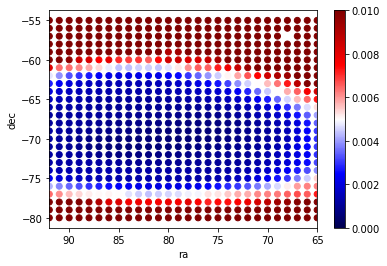

In [84]:
#Standard error of parallax
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([92,65])
sc = ax.scatter(acat['ra'], acat['dec'],c=acat['SE'], vmax=0.01, vmin=0, cmap=plt.cm.seismic)
fig.colorbar(sc)
